# Hypothesis test: Pass rate of the practical driving test in the UK

## Summary

**description**
: "a one sample **z**-test of equal means"

**data**
: `data/practical_test.csv`

Centre	Male	Female	Total
- **Centre** `str` : "location of test centre"
- **Male** `float` : "mean pass rate of males at the centre from
                      April 2014 to March 2015"
- **Female** `float` : "mean pass rate of females at the centre from
                        April 2014 to March 2015"
- **Total** `float` : "mean pass rate of males and females from April
                       2014 to March 2015"

**summary results**
:

```python
res(
    "sample_mean": 49.63038,
    "95%_confint": (48.84034, 50.42042),
    "zstat": 6.277,
    "pval": 0.00000)
```

**output**
: <!--Add path to FinishingM248-->


## Results

### Setup the notebook

In [1]:
# change working dir
import os
os.chdir("..\\")

In [2]:
# import packages
from statsmodels.stats.weightstats import DescrStatsW
from scipy.stats import probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# set default seaborn theme
sns.set_theme()

In [4]:
# import the data
df_prac_test = pd.read_csv("data\\practical_test.csv")

### Declare local variables

In [5]:
# get columns as Series
r_total = df_prac_test["Total"]

In [6]:
# declare and initialise DescrStatsW object for the hypothesis test
ztest = DescrStatsW(data=r_total)

In [7]:
# results dictionary
res = dict()

### Describe the sample

In [8]:
# send summary table to df for pretty output
pd.DataFrame(r_total).describe().T

,count,mean,std,min,25%,50%,75%,max
Total,316.0,49.63038,7.165444,30.3,44.975,49.65,54.5,71.3


In [9]:
# 95% z-interval
ztest.zconfint_mean()

(48.840342381395864, 50.42041711227501)

### Visualise the sample

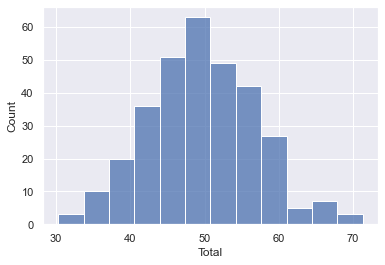

In [10]:
# plot the sample as a histogram
ax = sns.histplot(x=r_total, bins=12)
# save figs, drop to figures dir
os.chdir("figures")
plt.savefig("practest_fig1")
os.chdir("..")
# output the plot
plt.show()

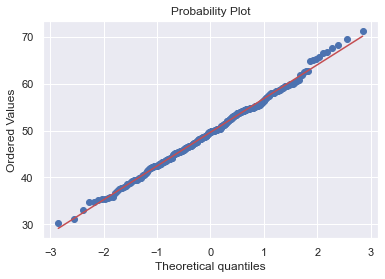

In [11]:
# normal probability plot of the same
f, ax = plt.subplots()
# construct the probability plot
probplot(x=r_total, plot=ax)
# save figs, drop to figures dir
os.chdir("figures")
plt.savefig("practest_fig2")
os.chdir("..")
# output the plot
plt.show()

### Run the $z$-test

In [12]:
# populate res
res["zstat"], res["pval"] = ztest.ztest_mean(value=47.1)
# print results
res

{'zstat': 6.2774919110915715, 'pval': 3.4407815848731304e-10}